# matplotlib

Allows to create a range of visualizations 


#### Creating a Plot Area

In [2]:
import matplotlib.pyplot as plt

figure()

In [3]:
# creating a figure object using the figure() method, assigning it to the variable fig
fig = plt.figure()

<Figure size 640x480 with 0 Axes>

#### add_axes()

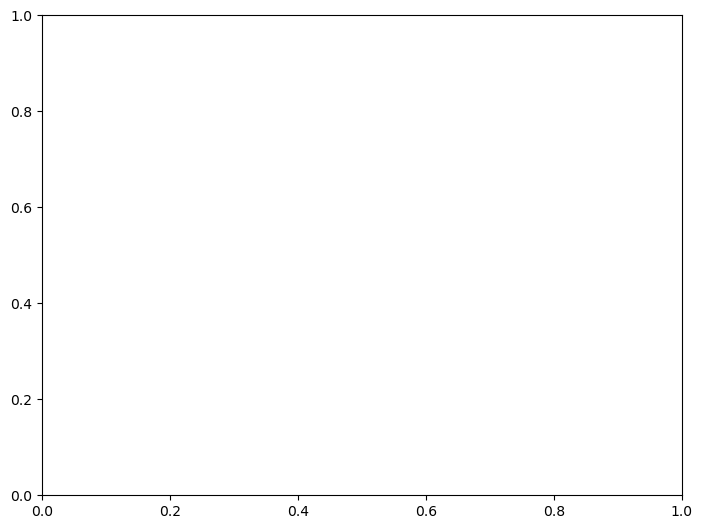

In [4]:
# We can use the add_axes method to add axes to the figure object
fig = plt.figure().add_axes(rect=[0,0,1,1])

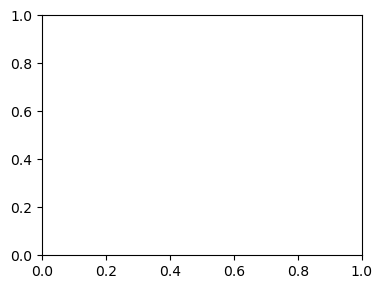

In [5]:
# The 3rd and 4th elements in the rect argument determine the scale of the width and height
# The default width / height is 6.4 / 4.8
fig = plt.figure().add_axes(rect=[0,0,0.5,0.5])

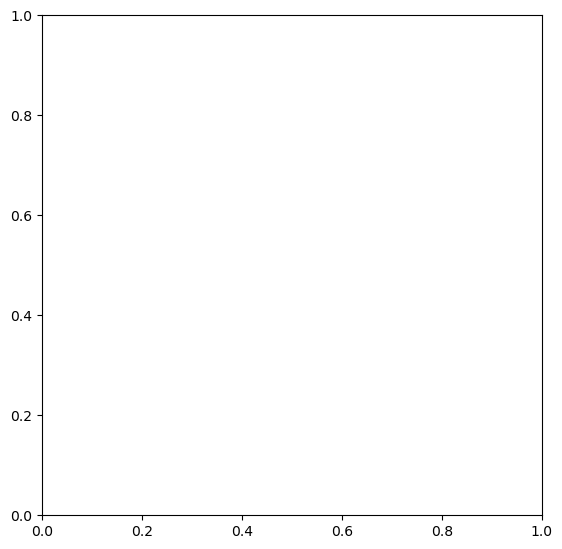

In [6]:
# You can assign the axes object to a variable, you can then call methods on the axes
fig = plt.figure(figsize=(5,5))

axes = fig.add_axes(rect=[0,0,1,1])

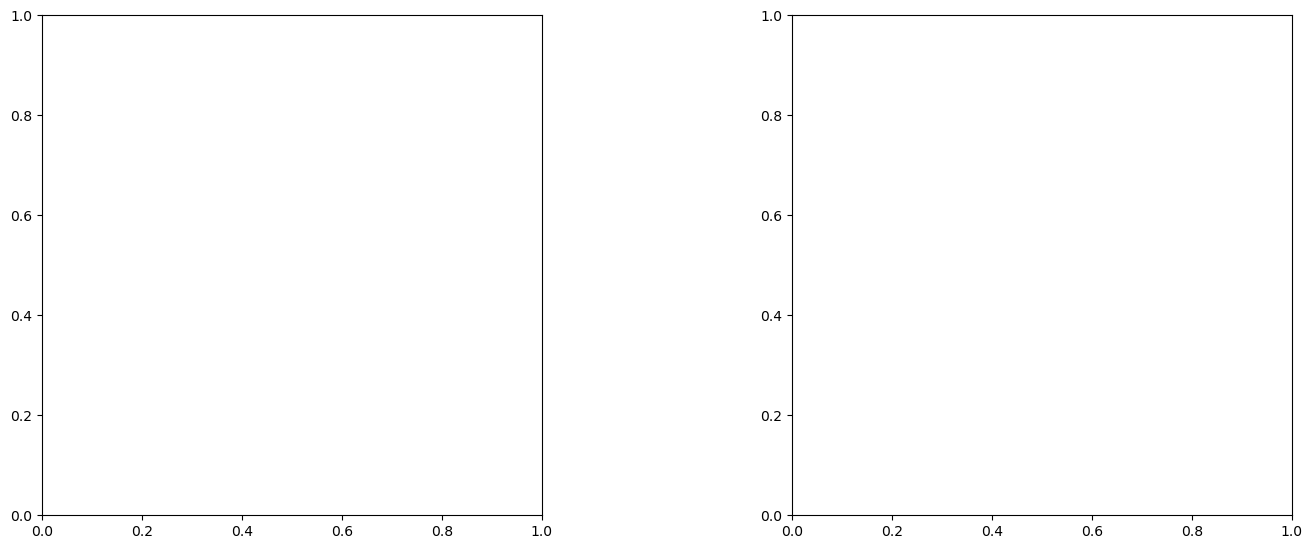

In [8]:
# Axes are side by side as the rect argument position is at a scale of 1.5 x the width to the right
fig = plt.figure(figsize=(5,5))

axes1 = fig.add_axes(rect=[0,0,1,1])
axes2 = fig.add_axes(rect=[1.5,0,1,1])

#### Adjusting the axis

(0.0, 50.0)

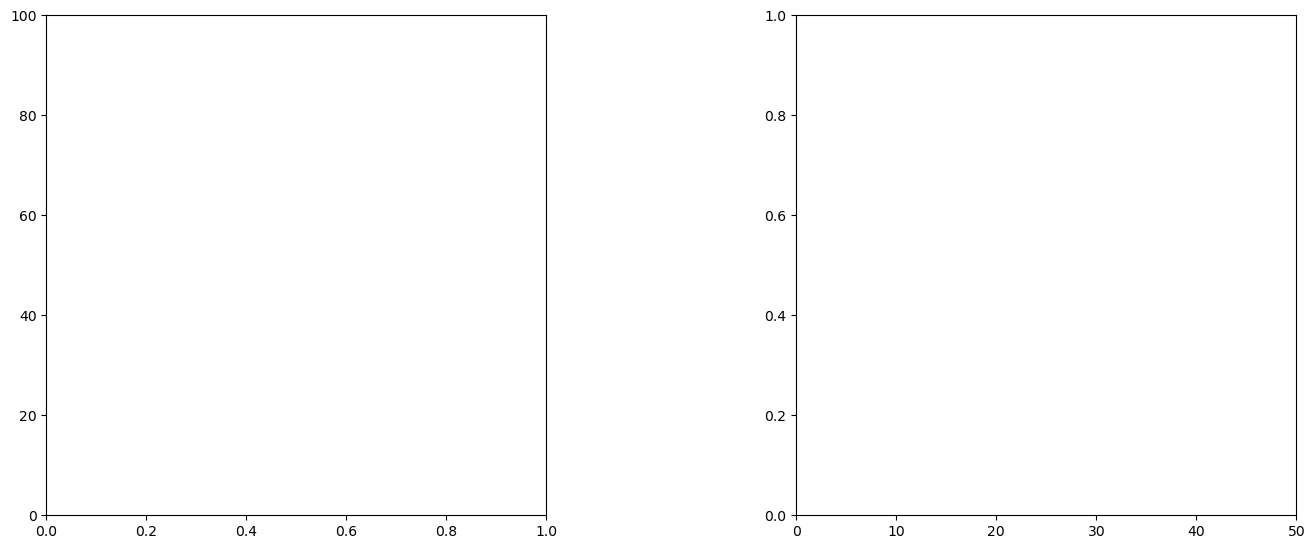

In [9]:
# Setting a range on the y axis of axes1 to 0 to 100
# Setting a range on the y axis of axes2 to 0 to 50
fig = plt.figure(figsize=(5,5))

axes1 = fig.add_axes(rect=[0,0,1,1])
axes2 = fig.add_axes(rect=[1.5,0,1,1])

axes1.set_ylim(0,100)
axes2.set_xlim(0,50)

#### Adding a Title and Labels

Text(0, 0.5, 'Y')

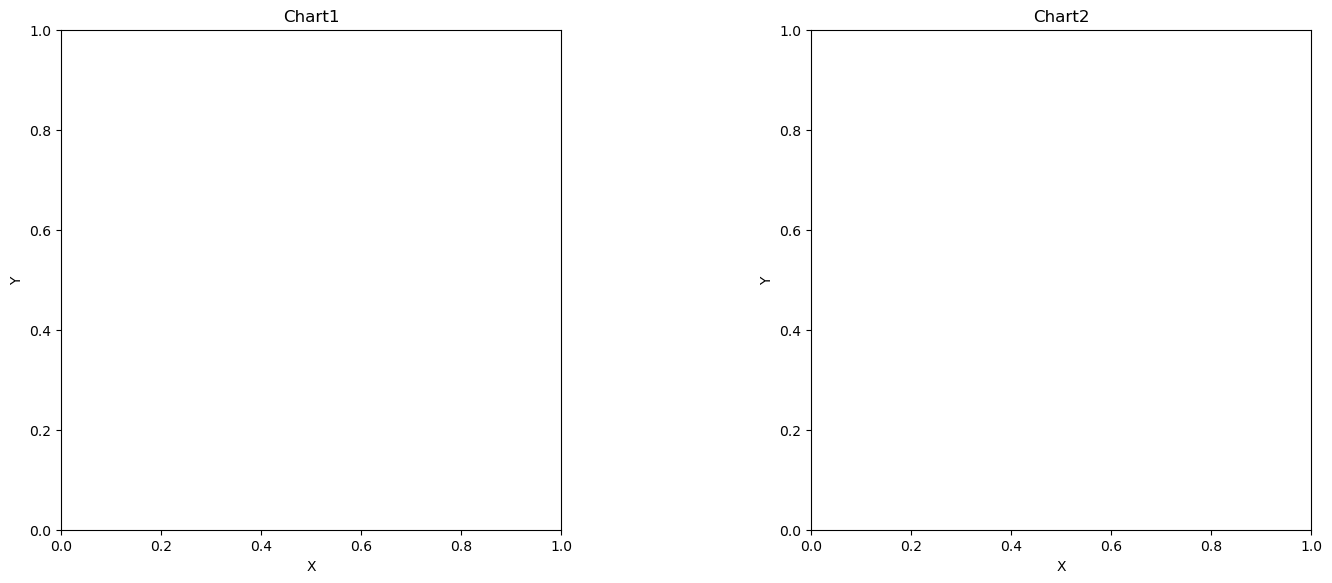

In [15]:
fig= plt.figure(figsize=(5,5))

axes1= fig.add_axes(rect=[0,0,1,1])
axes2= fig.add_axes(rect=[1.5,0,1,1])

axes1.set_title('Chart1')
axes2.set_title('Chart2')

axes1.set_xlabel('X')
axes1.set_ylabel('Y')

axes2.set_xlabel('X')
axes2.set_ylabel('Y')

## Project-

### Bike Hire Trends Analysis with Python & Matplotlib

##### Run the data preparation steps below. We will be creating three DataFrames:
##### • 'tfl' contains the following columns
* **'Day'**
* **'Number of Bicycle Hires'**
* **'Cumulative (m)'**: This is the running total in millions
* **'Day of Week'**: This is the Day of the week name
* **'Month'**: This is the Month name

##### • 'tfl_day' is an aggregated DataFrame and contains the following columns
* **'Day of Week'**: This is the Day of the week name
* **'Day Number'**: Weekday as a decimal number
* **'Number of Bicycle Hires (millions)'**

##### • 'tfl_month' is an aggregated DataFrame and contains the following columns
* **'Month'**: This is the Month
* **'Month Number'**
* **'Number of Bicycle Hires (millions)'**

In [17]:
## Importing pandas, numpy, matplotlib.pyplot and datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

In [18]:
tfl = pd.read_csv('tfl-daily-cycle-hires.csv')

In [21]:
tfl.dtypes

Day                        object
Number of Bicycle Hires     int64
dtype: object

In [23]:
# Changing 'Day' to be datetime dtype, 'Number of Bicycle Hires' as string
# Dropping extra columns
tfl['Day'] = pd.to_datetime(tfl['Day'], format='%d/%m/%Y')
tfl['Number of Bicycle Hires'] = tfl['Number of Bicycle Hires'].astype('float')


In [24]:
tfl.dtypes

Day                        datetime64[ns]
Number of Bicycle Hires           float64
dtype: object

In [25]:
# Sorting values by 'Day' ascending
tfl.sort_values('Day', ascending = True, inplace =True)

In [26]:
# Adding Cumulative total via expanding() window operation
tfl['Cumulative (millions)'] = tfl['Number of Bicycle Hires'].expanding().sum()/1000000

In [27]:
tfl.head()

,Day,Number of Bicycle Hires,Cumulative (millions)
4080,2010-07-30,6897.0,0.006897
4079,2010-07-31,5564.0,0.012461
4078,2010-08-01,4303.0,0.016764
4077,2010-08-02,6642.0,0.023406
4076,2010-08-03,7966.0,0.031372


In [28]:
# Creating additional columns
# You can see the format codes here: https://docs.python.org/3/library/datetime.html#strftime-strptime-behavior
# 'Day Number' and 'Month Number' are purely for ordering the DataFrame
tfl['Day of Week'] = tfl['Day'].dt.strftime('%A')
tfl['Month'] = tfl['Day'].dt.strftime('%B')
tfl['Day Number'] = tfl['Day'].dt.strftime('%w')
tfl['Month Number'] = tfl['Day'].dt.strftime('%m')

In [29]:
tfl


,Day,Number of Bicycle Hires,Cumulative (millions),Day of Week,Month,Day Number,Month Number
4080,2010-07-30,6897.0,0.006897,Friday,July,5,07
4079,2010-07-31,5564.0,0.012461,Saturday,July,6,07
4078,2010-08-01,4303.0,0.016764,Sunday,August,0,08
4077,2010-08-02,6642.0,0.023406,Monday,August,1,08
4076,2010-08-03,7966.0,0.031372,Tuesday,August,2,08
...,...,...,...,...,...,...,...
4,2021-09-26,45120.0,107.036280,Sunday,September,0,09
3,2021-09-27,32167.0,107.068447,Monday,September,1,09
2,2021-09-28,32539.0,107.100986,Tuesday,September,2,09
1,2021-09-29,39889.0,107.140875,Wednesday,September,3,09


In [30]:
# Creating the tfl_day DF
tfl_day = tfl[['Day of Week', 'Day Number','Number of Bicycle Hires']].groupby(by=['Day of Week','Day Number']).sum()

In [31]:
# Resetting index and returning 'Day of Week' and 'Day Number' as columns
tfl_day.reset_index(inplace=True)

In [32]:
# Sorting via the 'Day Number' column
tfl_day.sort_values('Day Number', inplace=True)

In [33]:
# New column showing the 'Number of Bicycle Hires (millions)'
tfl_day['Number of Bicycle Hires (millions)'] = round(tfl_day['Number of Bicycle Hires']/1000000,2)

In [34]:
# Dropping the 'Number of Bicycle Hires' column
tfl_day.drop(columns='Number of Bicycle Hires', inplace=True)

In [36]:
tfl_day

,Day of Week,Day Number,Number of Bicycle Hires (millions)
3,Sunday,0,13.01
1,Monday,1,15.21
5,Tuesday,2,16.38
6,Wednesday,3,16.43
4,Thursday,4,16.37
0,Friday,5,15.79
2,Saturday,6,13.99


In [37]:
# Creating the tfl_month DF
tfl_month = tfl[['Month', 'Month Number','Number of Bicycle Hires']].groupby(by=['Month','Month Number']).sum()

In [38]:
# Resetting index and returning 'Month of Week' and 'Month Number' as columns
tfl_month.reset_index(inplace=True)

In [39]:
# Sorting via the 'Month Number' column
tfl_month.sort_values('Month Number', inplace=True)

In [40]:
# New column showing the 'Number of Bicycle Hires (millions)'
tfl_month['Number of Bicycle Hires (millions)'] = round(tfl_month['Number of Bicycle Hires']/1000000,2)

In [41]:
# Dropping the 'Number of Bicycle Hires' column
tfl_month.drop(columns='Number of Bicycle Hires', inplace=True)

In [42]:
tfl_month

,Month,Month Number,Number of Bicycle Hires (millions)
4,January,01,6.22
3,February,02,6.11
7,March,03,7.52
0,April,04,8.56
8,May,05,10.36
6,June,06,10.99
5,July,07,12.12
1,August,08,11.68
11,September,09,11.22
10,October,10,9.17


## Lets start with Data Visualization now

#### Create a bar plot using the tfl_day DataFrame 
* It should have a figuresize of (20,5)
* It should plot 'Day of Week' on the x-axis and 'Number of Bicycle Hires (millions)' for the height
* Title the Chart 'Total Bike Hires by Day of Week', fontsize 30
* y-label should be 'Bike Hires (m)', fontsize 20
* xticks and yticks should have a fontsize of 15

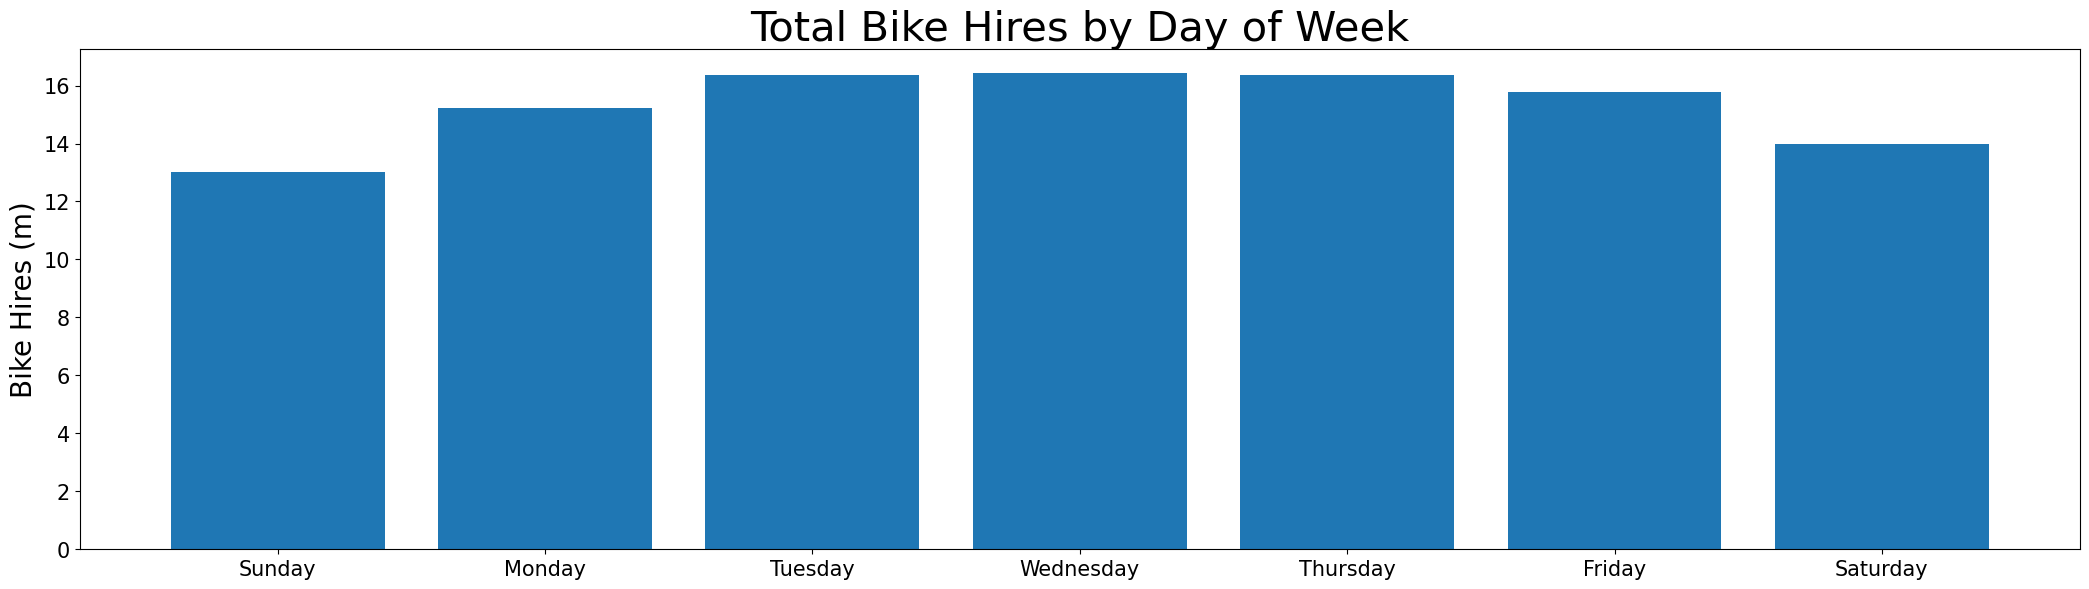

In [44]:
fig = plt.figure(figsize=(20,5))
axes = fig.add_axes([0,0,1,1])

axes.bar(x='Day of Week', height='Number of Bicycle Hires (millions)', data=tfl_day)

axes.set_title('Total Bike Hires by Day of Week', fontsize= 30)
axes.set_ylabel('Bike Hires (m)', fontsize = 20)

plt.yticks(fontsize=15)
plt.xticks(fontsize=15)

plt.show()

#### Changing the color of the bars

#### add the following color codes with a black edgecolor:¶
* Sunday: #6867AC
* Monday: #A267AC
* Tuesday: #CE7BB0
* Wednesday: #FFBCD1
* Thursday: #BAABDA
* Friday: #D3DEDC
* Saturday: #FFFDDE

HINT: You can get this color from the offivial document page from Matplotlib.

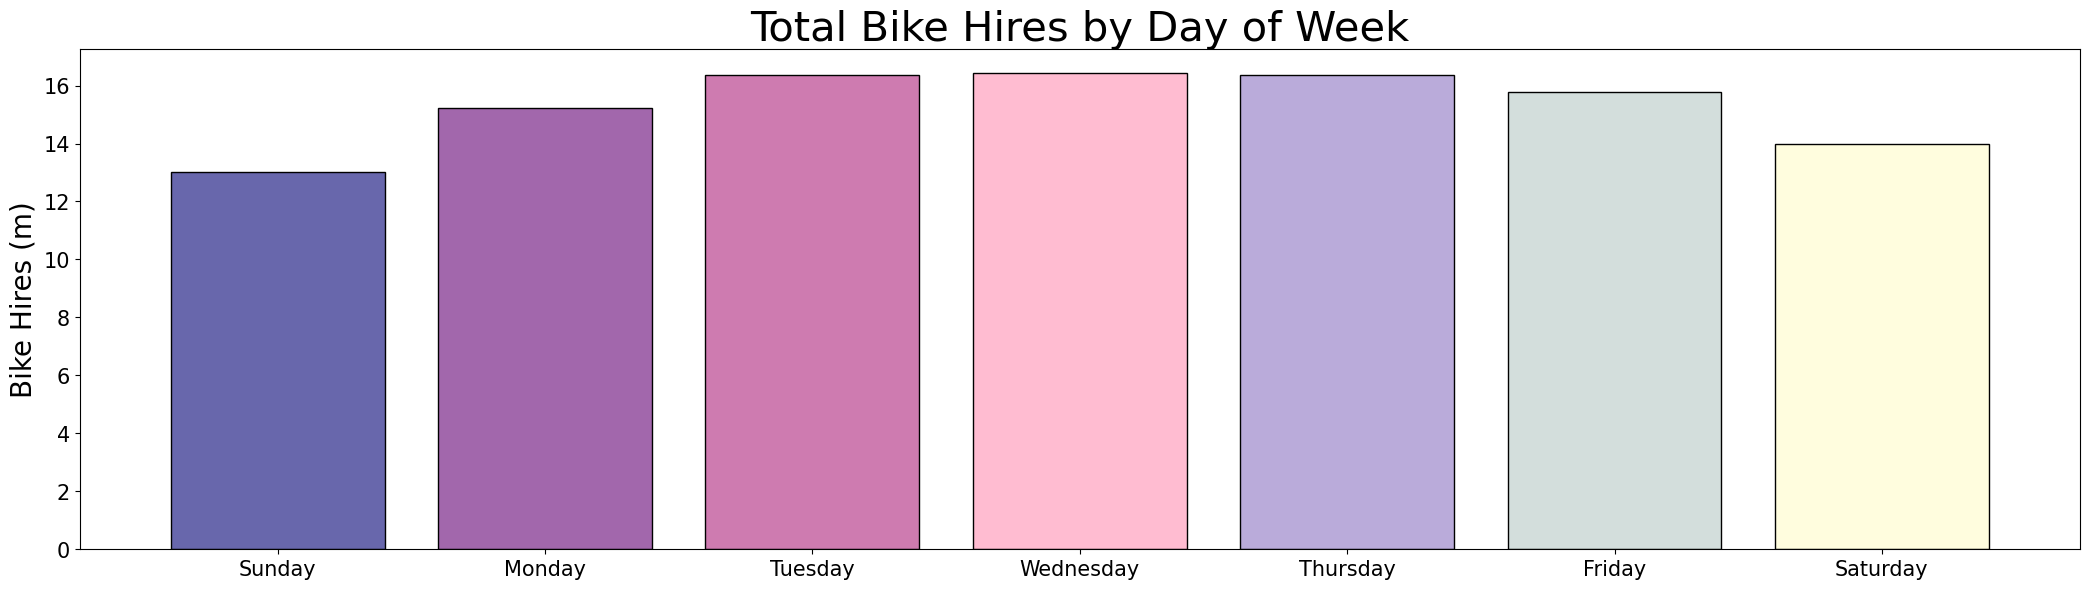

In [46]:
fig = plt.figure(figsize=(20,5))
axes = fig.add_axes([0,0,1,1])

color = ['#6867AC','#A267AC','#CE7BB0','#FFBCD1','#BAABDA','#D3DEDC','#FFFDDE']

axes.bar(x='Day of Week', height='Number of Bicycle Hires (millions)', data=tfl_day, color=color, edgecolor='black')

axes.set_title('Total Bike Hires by Day of Week', fontsize=30)
axes.set_ylabel('Bike Hires (m)', fontsize = 20)

plt.yticks(fontsize=15)
plt.xticks(fontsize=15)

plt.show()

#### Create a bar plot using the tfl_month DataFrame 
* It should have a figuresize of (20,5)
* It should plot 'Month' on the x-axis and 'Number of Bicycle Hires' for the height
* Title the Chart 'Total Bike Hires by Month', fontsize 30
* y-label should be 'Bike Hires (m)', fontsize 20
* xticks and yticks should have a fontsize of 15

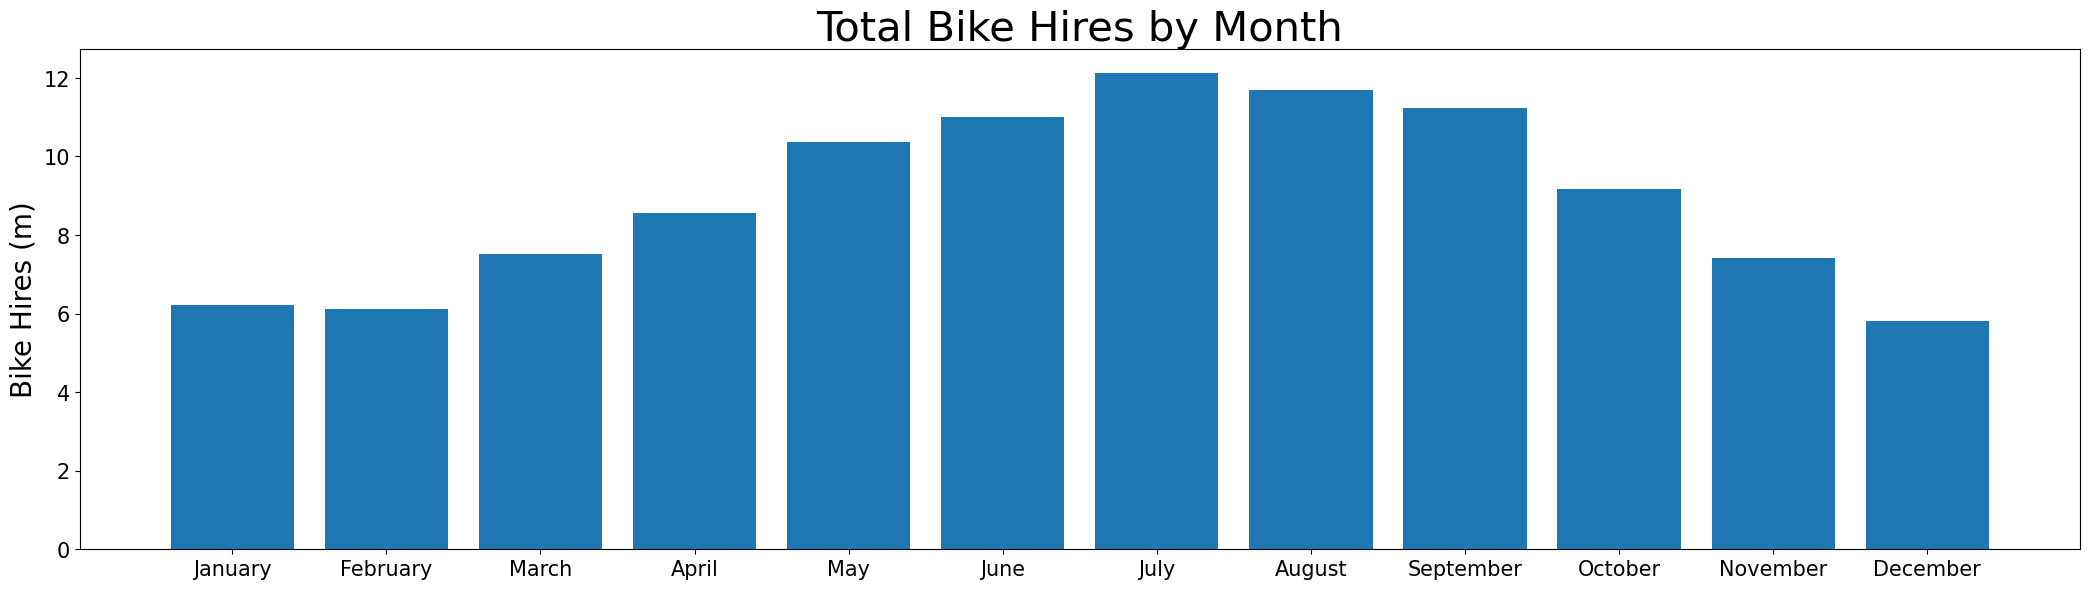

In [47]:
fig = plt.figure(figsize=(20,5))
axes = fig.add_axes([0,0,1,1])

axes.bar(x='Month', height='Number of Bicycle Hires (millions)', data=tfl_month)

axes.set_title('Total Bike Hires by Month', fontsize=30)
axes.set_ylabel('Bike Hires (m)', fontsize = 20)

plt.yticks(fontsize=15)
plt.xticks(fontsize=15)

plt.show()

## Using the tfl DataFrame create a chart with a secondary y-axis:
* It should have a figuresize of (20,10)
* 'Day' on the x-axis
* 'Number of Bicycle Hires' on the left (main) y-axis as a Bar Plot, color '#CE7BB0'
* 'Cumulative' on the right (secondary) y-axis as a Line Plot, color '#6867AC'
* Title the Chart 'TfL Bike Hires (Combo Chart)', fontsize 30
* The left y-axis label should be 'Daily Number of Bicycle Hires', fontsize 20
* The right y-axis label should be 'Cumulative Total (millions)', fontsize 20
* The x-axis label should be 'Date', fontsize 20

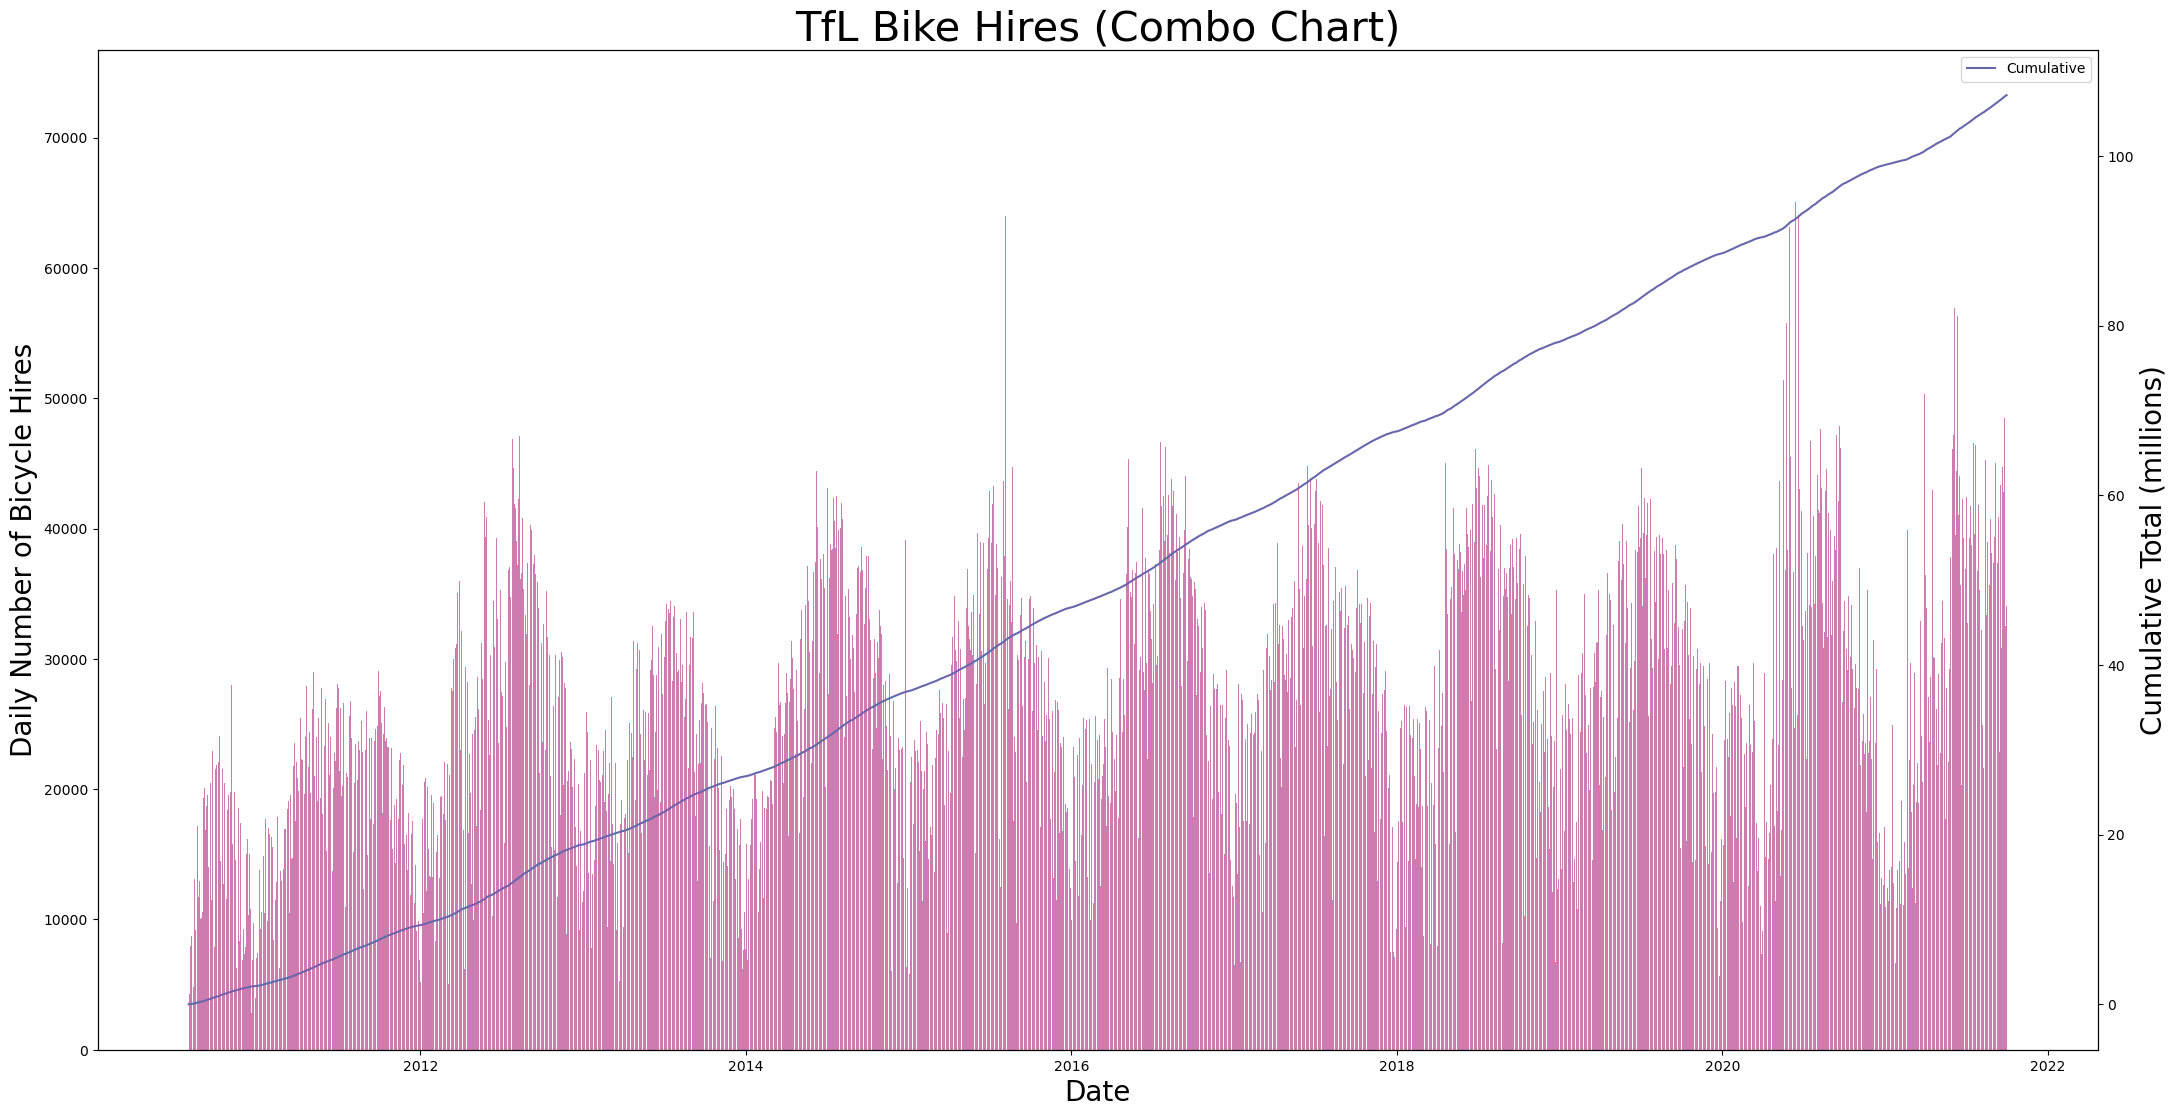

In [48]:
fig = plt.figure(figsize=(20,10))
axes1 = fig.add_axes([0,0,1,1])
axes2 = axes1.twinx()

axes1.bar('Day','Number of Bicycle Hires', data=tfl, color='#CE7BB0')
axes2.plot('Day','Cumulative (millions)', data=tfl, color='#6867AC',label='Cumulative')

axes1.set_title('TfL Bike Hires (Combo Chart)', fontsize=30)
axes1.set_xlabel('Date', fontsize=20)
axes1.set_ylabel('Daily Number of Bicycle Hires', fontsize=20)
axes2.set_ylabel('Cumulative Total (millions)', fontsize=20)

plt.legend()

plt.show()

C:\Users\Bhushan Patil\AppData\Local\Temp\ipykernel_13452\3699840233.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes1.boxplot(tfl['Number of Bicycle Hires'], showfliers=False, labels=[''])
C:\Users\Bhushan Patil\AppData\Local\Temp\ipykernel_13452\3699840233.py:25: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


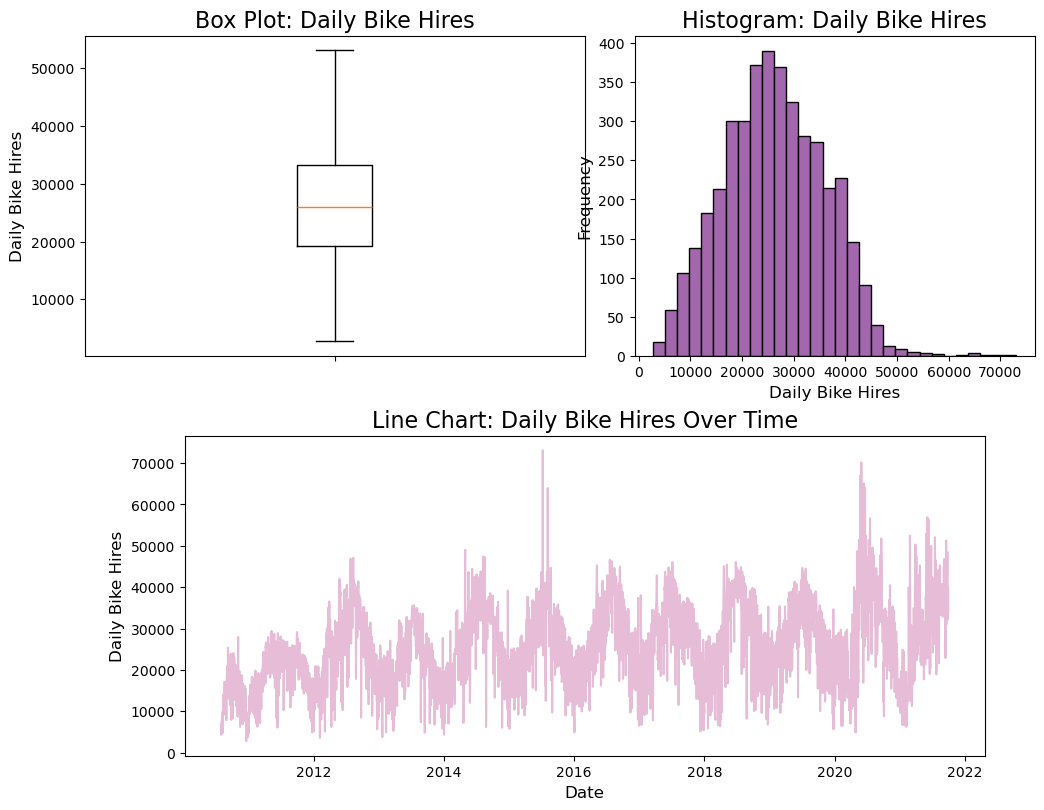

In [51]:


fig = plt.figure(figsize=(10, 8))  # Increased size for better layout

# Create 3 separate axes within the figure
axes1 = fig.add_axes([0, 0.55, 0.5, 0.4])   # Boxplot
axes2 = fig.add_axes([0.55, 0.55, 0.4, 0.4])  # Histogram
axes3 = fig.add_axes([0.1, 0.05, 0.8, 0.4])   # Line chart

# Boxplot: No outliers, label is blank to suppress x-axis label
axes1.boxplot(tfl['Number of Bicycle Hires'], showfliers=False, labels=[''])
axes1.set_title('Box Plot: Daily Bike Hires', fontsize=16)
axes1.set_ylabel('Daily Bike Hires', fontsize=12)

# Histogram: With color and edge styling
axes2.hist(tfl['Number of Bicycle Hires'], bins=30, color='#A267AC', edgecolor='black')
axes2.set_title('Histogram: Daily Bike Hires', fontsize=16)
axes2.set_xlabel('Daily Bike Hires', fontsize=12)
axes2.set_ylabel('Frequency', fontsize=12)

# Line Plot: Showing how hires vary over time
axes3.plot(tfl['Day'], tfl['Number of Bicycle Hires'], color='#CE7BB0', alpha=0.5)
axes3.set_title('Line Chart: Daily Bike Hires Over Time', fontsize=16)
axes3.set_xlabel('Date', fontsize=12)
axes3.set_ylabel('Daily Bike Hires', fontsize=12)

plt.tight_layout()
plt.show()


#### ## Create a Plot Area Consisting of 2 axes (2 rows and 1 column) using the Subplots method
* The Plot Area should have a figuresize of (15,10) and a tight_layout

## Plot the following Bar Charts:
### On the top axes plot a bar chart using the tfl_month DataFrame
* 'Month' on the x-axis with a label of 'Month'
* 'Number of Bicycle Hires (millions)' on the y-axis with a label of 'Bike Hires (m)'

### On the bottom axes plot a bar chart using the tfl_day DataFrame
* 'Day of Week' on the x-axis with a label of 'Day of Week'
* 'Number of Bicycle Hires (millions)' on the y-axis with a label of 'Bike Hires (m)'


* Format both charts however you like

Text(0, 0.5, 'Bike Hires (m)')

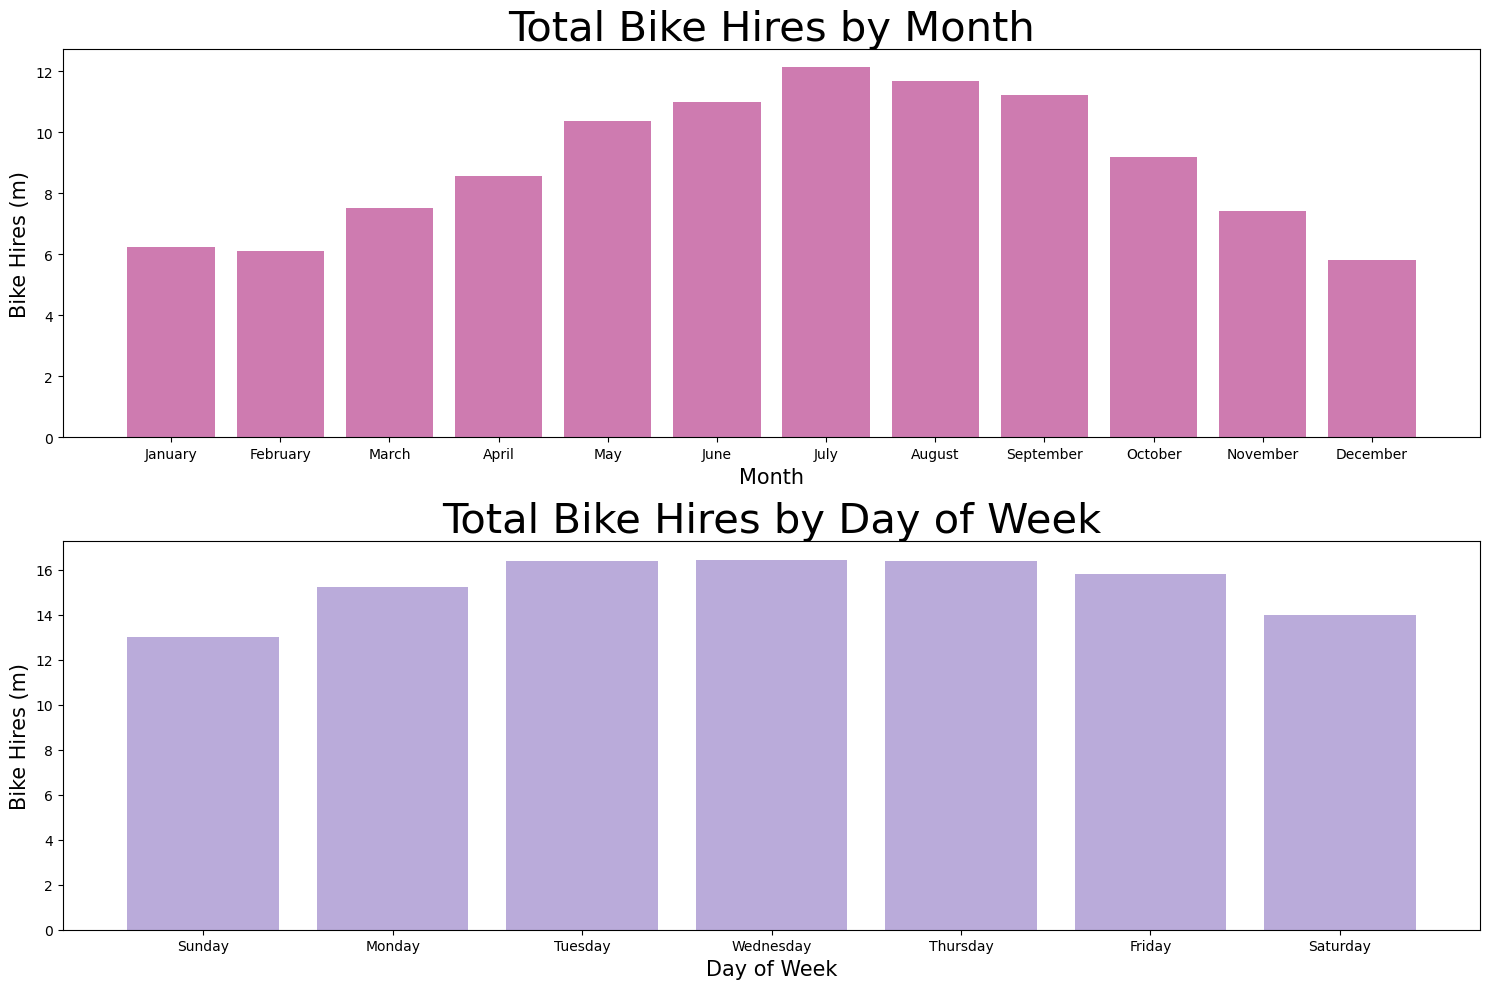

In [52]:
fix, (ax1,ax2) = plt.subplots(2,1, figsize=(15,10), tight_layout=True)

ax1.bar('Month','Number of Bicycle Hires (millions)', data=tfl_month, color='#CE7BB0')
ax2.bar('Day of Week','Number of Bicycle Hires (millions)', data=tfl_day, color='#BAABDA')

ax1.set_title('Total Bike Hires by Month', fontsize=30)
ax1.set_xlabel('Month', fontsize=15)
ax1.set_ylabel('Bike Hires (m)', fontsize=15)

ax2.set_title('Total Bike Hires by Day of Week', fontsize=30)
ax2.set_xlabel('Day of Week', fontsize=15)
ax2.set_ylabel('Bike Hires (m)', fontsize=15)